In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#Load dataset
data = pd.read_csv('C:/Users/shrey/OneDrive/Desktop/Energy Consumption/Data/Energy.csv')
data.head()

,nm Building_ID,Building_Type,Consumption_Energy_Usage,Consumption_Energy_Ur_Consumption,Occupants,Floor_Area,Energy_Efficiency_Rating
0,B0001,Commercial,332.15,37.44,16,2930,B
1,B0002,Industrial,234.68,109.89,53,1122,B
2,B0003,Commercial,320.71,48.00,269,4852,A
3,B0004,Industrial,66.93,126.21,219,4069,A
4,B0005,Industrial,107.63,53.15,76,894,C


In [46]:
# Dataset shape
print(f"\nDataset Shape: {data.shape[0]} rows × {data.shape[1]} columns")

# Dataset info
print("\nDataset Info:")
data.info()


Dataset Shape: 1000 rows × 7 columns

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   nm                                                    Building_ID  1000 non-null   object 
 1   Building_Type                                                      1000 non-null   object 
 2   Consumption_Energy_Usage                                           1000 non-null   float64
 3   Consumption_Energy_Ur_Consumption                                  1000 non-null   float64
 4   Occupants                                                          1000 non-null   int64  
 5   Floor_Area                                                         1000 non-null   int64  
 6   Energy_Efficiency_Rating                                           10

In [47]:
# Summary statistics
print("\nStatistical Summary:")
display(data.describe().T)

# Check for duplicates
print(f"\nDuplicate rows: {data.duplicated().sum()}")



Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Consumption_Energy_Usage,1000.0,276.97670,129.486753,50.11,159.7475,275.395,390.1625,499.76
Consumption_Energy_Ur_Consumption,1000.0,78.12899,42.035013,5.06,43.7225,76.075,113.8675,149.88
Occupants,1000.0,150.45900,86.558065,1.00,76.0000,151.000,226.0000,299.00
Floor_Area,1000.0,2725.20900,1313.071102,509.00,1556.5000,2752.500,3909.0000,4988.00



Duplicate rows: 0


In [48]:
# Missing value check
print("\nMissing Values per Column:")
missing = data.isnull().sum()
display(missing)



Missing Values per Column:


nm                                                    Building_ID    0
Building_Type                                                        0
Consumption_Energy_Usage                                             0
Consumption_Energy_Ur_Consumption                                    0
Occupants                                                            0
Floor_Area                                                           0
Energy_Efficiency_Rating                                             0
dtype: int64

Text(0.5, 1.02, 'Pairplot of Numerical Features Colored by Building Type')

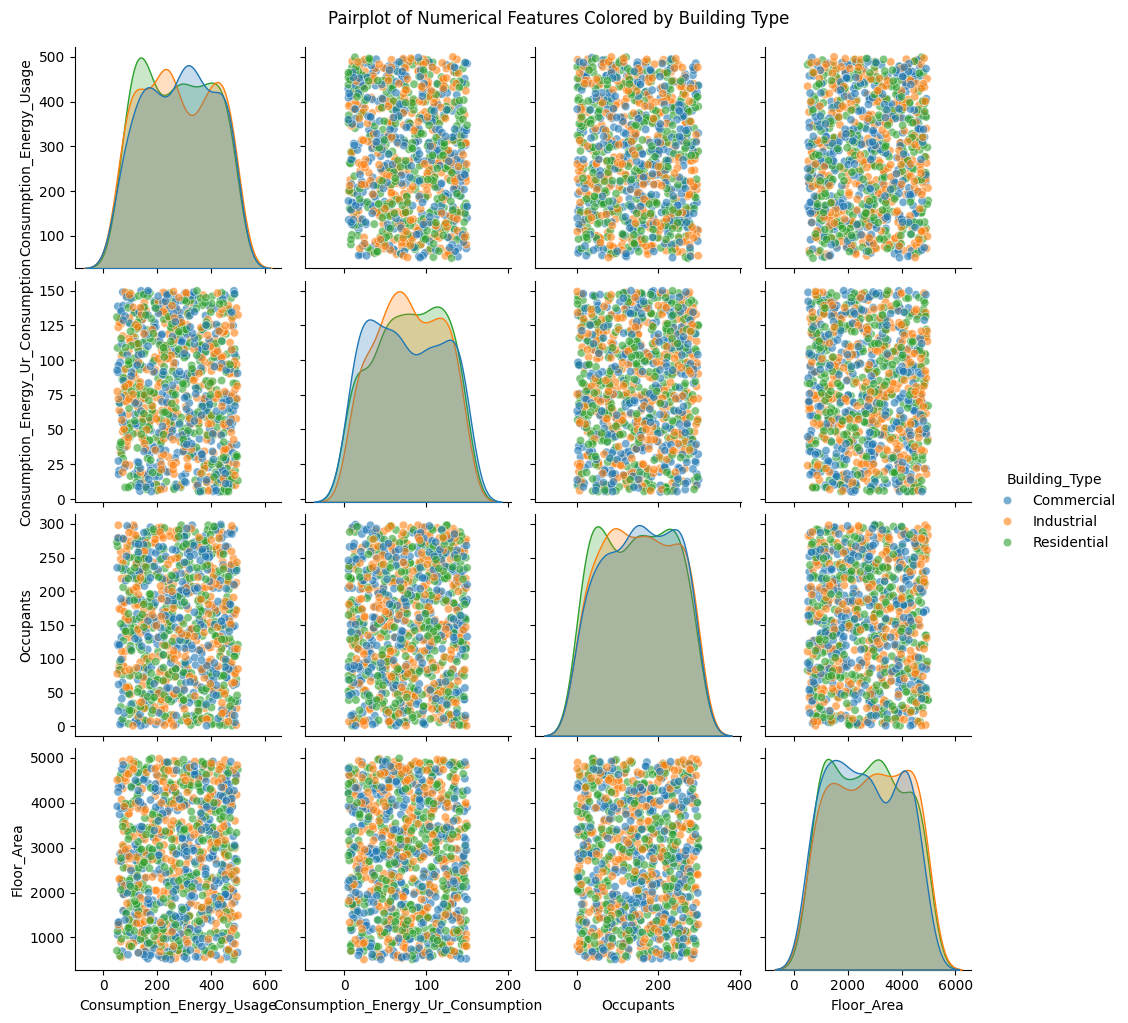

In [49]:

# Select numerical features and the 'Building_Type' for hue
numerical_cols = [
    'Consumption_Energy_Usage',
    'Consumption_Energy_Ur_Consumption',
    'Occupants',
    'Floor_Area'
]
hue_col = 'Building_Type'

# Create the dataframe subset for the pairplot
pairplot_df = data[numerical_cols + [hue_col]]

# Generate the pairplot
sns.pairplot(pairplot_df, hue=hue_col, height=2.5, plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Numerical Features Colored by Building Type', y=1.02)



Numeric Columns:
['Consumption_Energy_Usage', 'Consumption_Energy_Ur_Consumption', 'Occupants', 'Floor_Area']


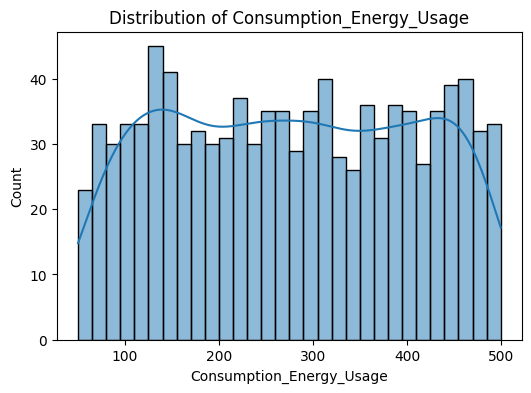

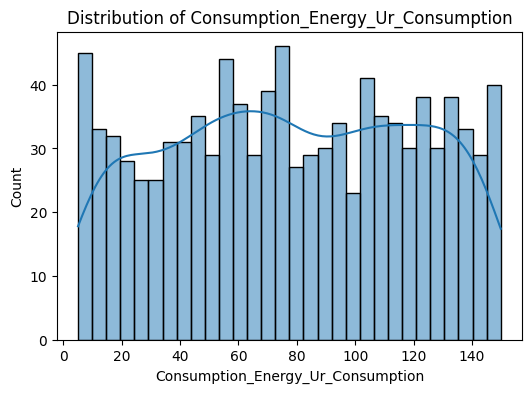

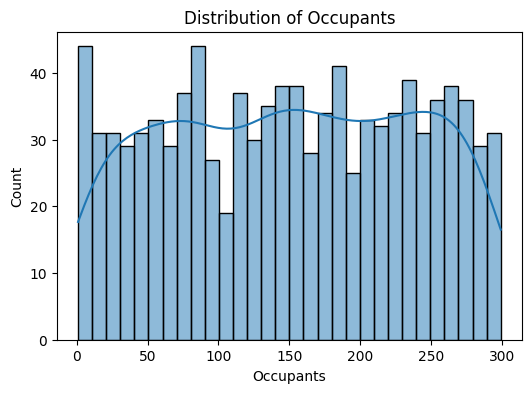

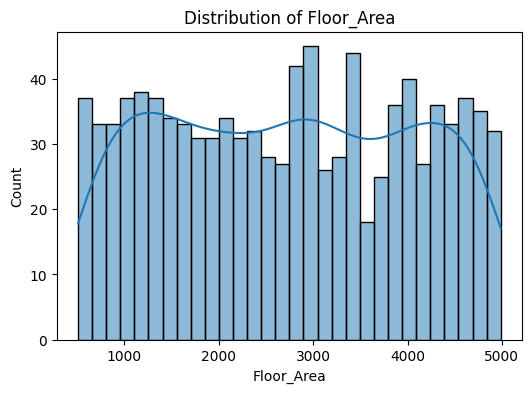

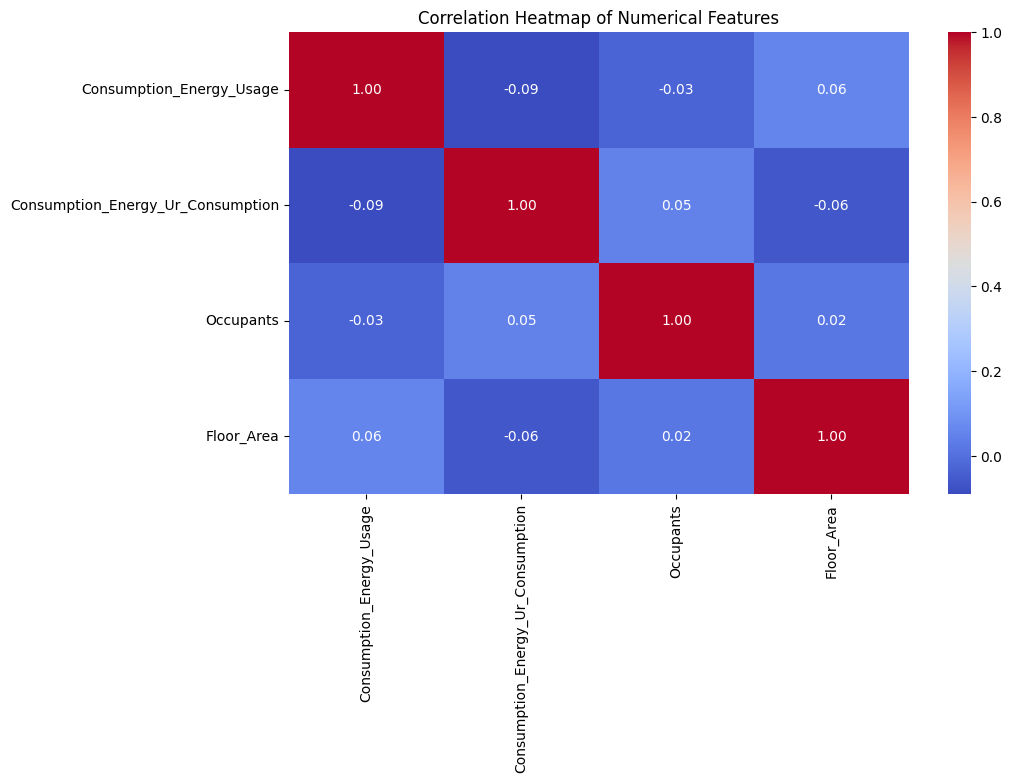

In [50]:
data.drop(columns=['nm                                                    Building_ID'], inplace=True)

# Distribution of numeric features
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

print("\nNumeric Columns:")
print(numeric_cols)

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



Categorical Columns:
['Building_Type', 'Energy_Efficiency_Rating']

Building_Type Value Counts:
Building_Type
Residential    338
Industrial     333
Commercial     329
Name: count, dtype: int64


C:\Users\shrey\AppData\Local\Temp\ipykernel_29156\4286525317.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set3")


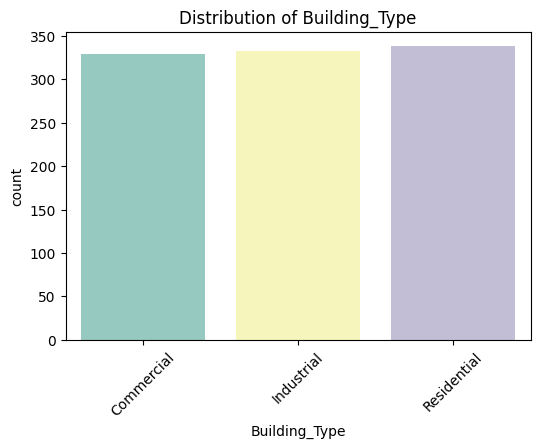


Energy_Efficiency_Rating Value Counts:
Energy_Efficiency_Rating
A     272
B     248
C     242
A+    238
Name: count, dtype: int64


C:\Users\shrey\AppData\Local\Temp\ipykernel_29156\4286525317.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set3")


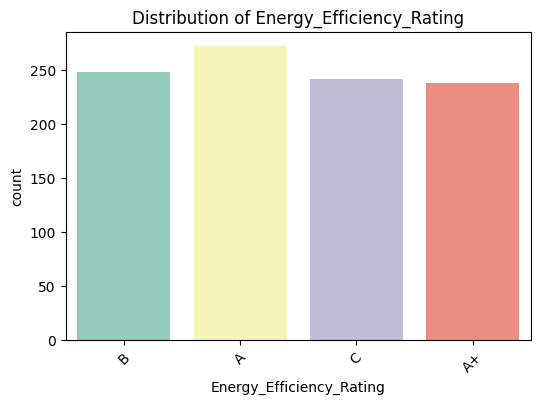

In [51]:
# Identify categorical columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nCategorical Columns:")
print(cat_cols)

# Value counts for categorical variables
for col in cat_cols:
    print(f"\n{col} Value Counts:")
    print(data[col].value_counts())
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col, palette="Set3")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


Numerical Columns (4): ['Consumption_Energy_Usage', 'Consumption_Energy_Ur_Consumption', 'Occupants', 'Floor_Area']
Categorical Columns (2): ['Building_Type', 'Energy_Efficiency_Rating']
------------------------------------------------------------

Outlier Detection (Numerical Columns):
Consumption_Energy_Usage: 0 outliers (0.00%) | Range < -185.88 or > 735.79
Consumption_Energy_Ur_Consumption: 0 outliers (0.00%) | Range < -61.50 or > 219.09
Occupants: 0 outliers (0.00%) | Range < -149.00 or > 451.00
Floor_Area: 0 outliers (0.00%) | Range < -1972.25 or > 7437.75

Outlier Summary Table:
                              Column  Outlier_Count  Outlier_Percentage  \
0           Consumption_Energy_Usage              0                 0.0   
1  Consumption_Energy_Ur_Consumption              0                 0.0   
2                          Occupants              0                 0.0   
3                         Floor_Area              0                 0.0   

   Lower_Bound  Upper_Bound  
0

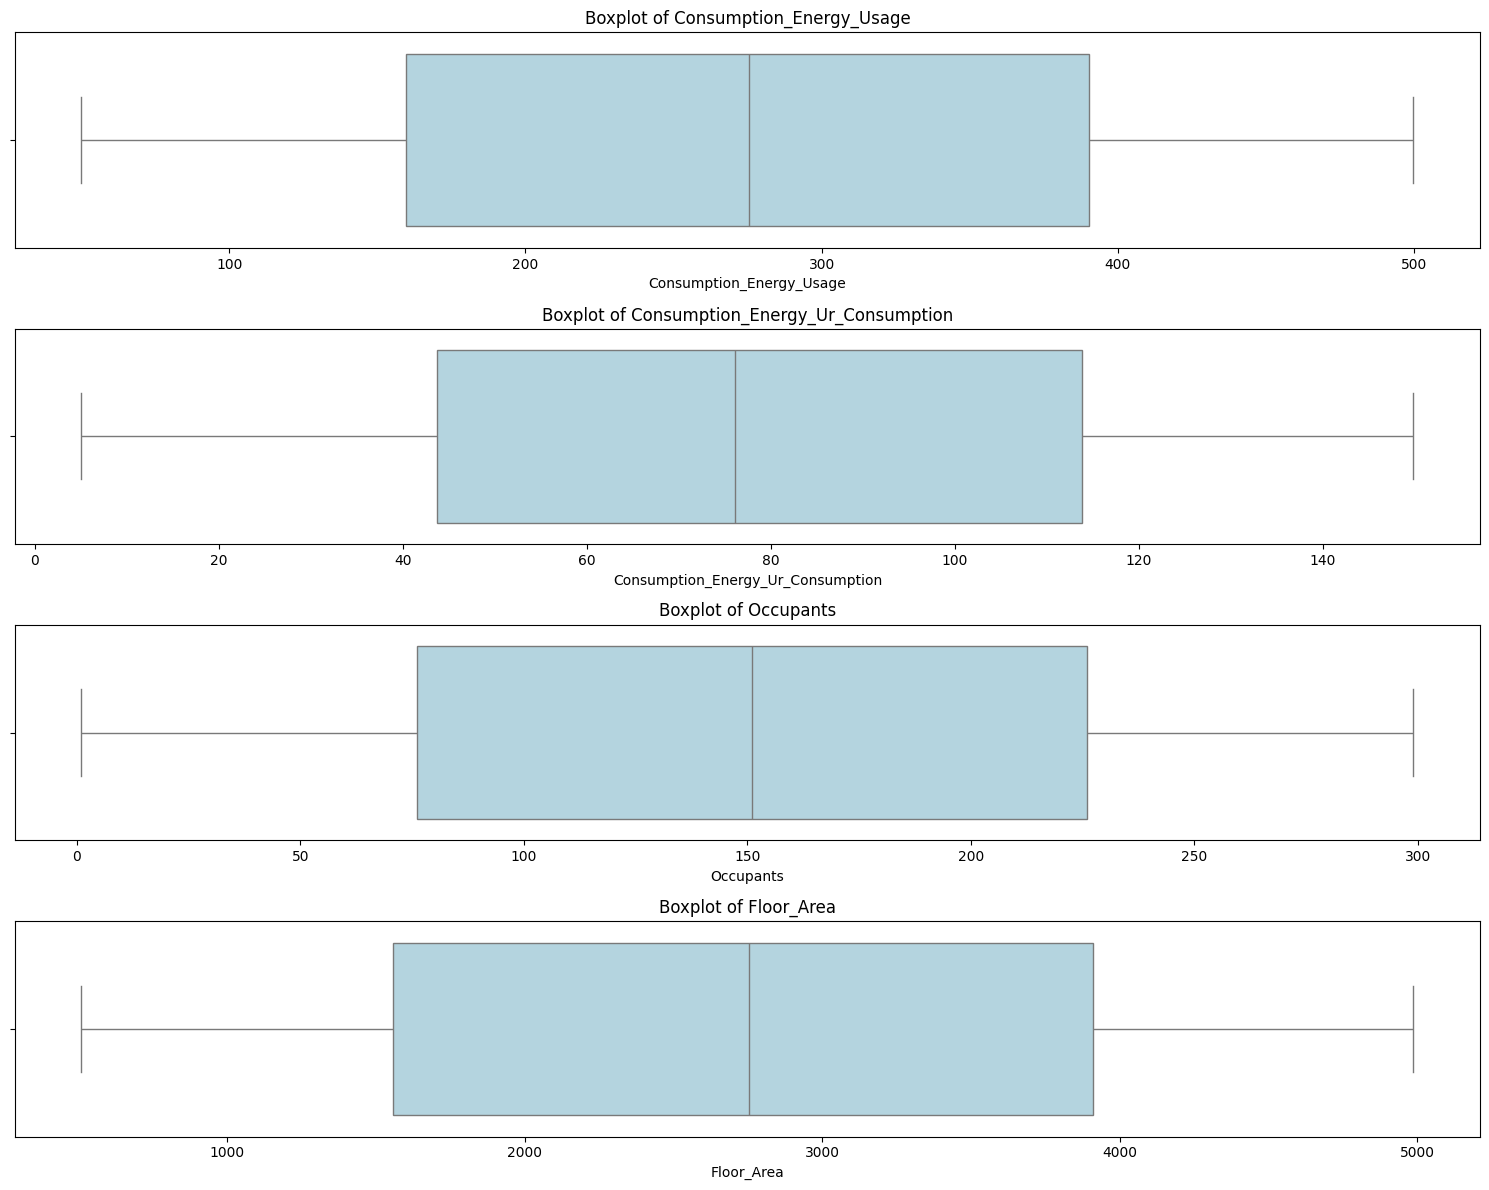


Categorical Feature Analysis:

Building_Type:
 - Unique values: 3
 - Most common: Residential (338 occurrences)
 - No rare categories found ✅

Energy_Efficiency_Rating:
 - Unique values: 4
 - Most common: A (272 occurrences)
 - No rare categories found ✅

Summary of Categorical Features:
                     Column  Unique_Values Rare_Classes
0             Building_Type              3         None
1  Energy_Efficiency_Rating              4         None


In [52]:
# Separate columns by data type
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

print(f"Numerical Columns ({len(num_cols)}): {list(num_cols)}")
print(f"Categorical Columns ({len(cat_cols)}): {list(cat_cols)}")
print("-" * 60)

# =============================
# NUMERICAL OUTLIER ANALYSIS
# =============================

def detect_outliers(df, col):
    """Detect outliers using the IQR method."""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    return lower, upper, outliers

num_summary = []

print("\nOutlier Detection (Numerical Columns):")
for col in num_cols:
    lower, upper, outliers = detect_outliers(data, col)
    num_summary.append({
        "Column": col,
        "Outlier_Count": len(outliers),
        "Outlier_Percentage": round((len(outliers) / len(data)) * 100, 2),
        "Lower_Bound": round(lower, 2),
        "Upper_Bound": round(upper, 2)
    })
    print(f"{col}: {len(outliers)} outliers ({(len(outliers)/len(data))*100:.2f}%) | Range < {lower:.2f} or > {upper:.2f}")


num_summary_df = pd.DataFrame(num_summary)
print("\nOutlier Summary Table:")
print(num_summary_df)

# Box plots for numerical columns
print("\nGenerating Boxplots for Numerical Columns...")
plt.figure(figsize=(15, len(num_cols)*3))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(data=data, x=col, color='lightblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()
plt.show()

# ==================================
# CATEGORICAL ANOMALY INSPECTION
# ==================================

print("\nCategorical Feature Analysis:")
cat_summary = []

for col in cat_cols:
    freq = data[col].value_counts(dropna=False)
    unique_vals = len(freq)
    rare_threshold = 0.01 * len(data)  # less than 1% frequency → anomaly
    rare_classes = freq[freq < rare_threshold].index.tolist()

    cat_summary.append({
        "Column": col,
        "Unique_Values": unique_vals,
        "Rare_Classes": rare_classes if rare_classes else "None",
    })

    print(f"\n{col}:")
    print(f" - Unique values: {unique_vals}")
    print(f" - Most common: {freq.index[0]} ({freq.iloc[0]} occurrences)")
    if rare_classes:
        print(f" - Rare/Anomalous categories (<1% freq): {rare_classes}")
    else:
        print(" - No rare categories found ✅")

# summary
cat_summary_df = pd.DataFrame(cat_summary)

print("\nSummary of Categorical Features:")
print(cat_summary_df)

Average Energy Consumption by Building Type:
                     mean         std    min     max  count
Building_Type                                              
Commercial     281.120608  127.834643  51.16  498.19    329
Industrial     276.751321  132.155946  51.41  499.76    333
Residential    273.165178  128.688372  50.11  499.15    338


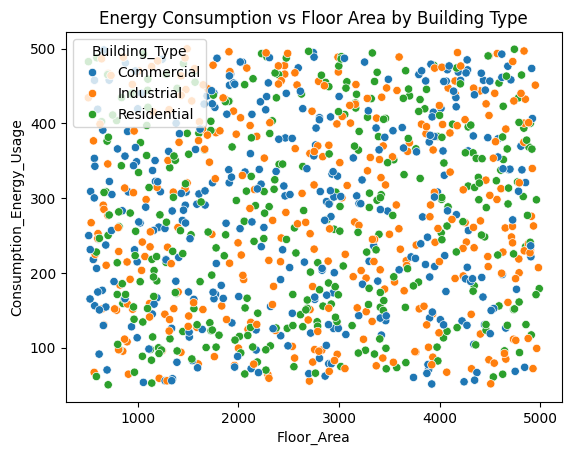

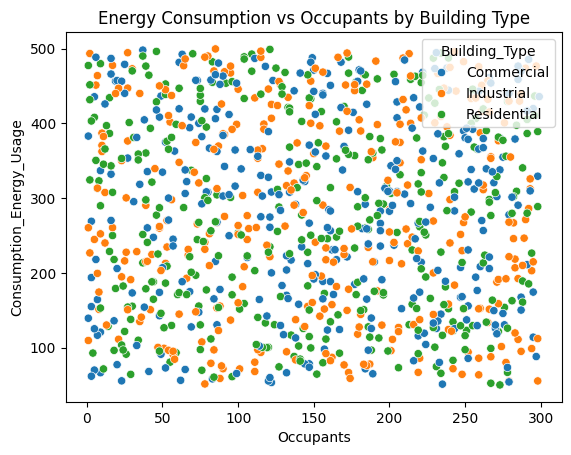

In [53]:
# Grouped mean by building type
group_summary = data.groupby('Building_Type')['Consumption_Energy_Usage'].agg(['mean', 'std', 'min', 'max', 'count']).sort_values('mean', ascending=False)
print("Average Energy Consumption by Building Type:")
print(group_summary)

# Scatter plots to inspect relationships
sns.scatterplot(x='Floor_Area', y='Consumption_Energy_Usage', hue='Building_Type', data=data)
plt.title('Energy Consumption vs Floor Area by Building Type')
plt.show()

sns.scatterplot(x='Occupants', y='Consumption_Energy_Usage', hue='Building_Type', data=data)
plt.title('Energy Consumption vs Occupants by Building Type')
plt.show()


In [ ]:
# Feature Engineering
# Add Energy per Occupant (Energy_Consumption / Occupants)
data["Energy_per_Occupant"] = data["Consumption_Energy_Usage"] / data["Occupants"].replace(0, pd.NA)

# Add Energy per Floor Area (Energy_Consumption / Floor_Area)
data["Energy_per_FloorArea"] = data["Consumption_Energy_Usage"] / data["Floor_Area"].replace(0, pd.NA)

# Handle any infinite or missing values
data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
data.fillna(data.median(numeric_only=True), inplace=True)

# Sve the dataset
data.to_csv("Energy_Features.csv", index=False)
print(data.head())


  Building_Type  Consumption_Energy_Usage  Consumption_Energy_Ur_Consumption  \
0    Commercial                    332.15                              37.44   
1    Industrial                    234.68                             109.89   
2    Commercial                    320.71                              48.00   
3    Industrial                     66.93                             126.21   
4    Industrial                    107.63                              53.15   

   Occupants  Floor_Area Energy_Efficiency_Rating  Energy_per_Occupant  \
0         16        2930                        B            20.759375   
1         53        1122                        B             4.427925   
2        269        4852                        A             1.192230   
3        219        4069                        A             0.305616   
4         76         894                        C             1.416184   

   Energy_per_FloorArea  
0              0.113362  
1              0.20916

In [55]:
from sklearn.preprocessing import OneHotEncoder

# Load the dataset with new features
data = pd.read_csv("Energy_Features.csv")

# Identify categorical columns
cat_cols = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", list(cat_cols))

# One-Hot Encode categorical features
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(data[cat_cols])

# Create encoded DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cat_cols))

# Merge with numerical data
numerical_df = data.drop(columns=cat_cols)
encoded_data = pd.concat([numerical_df, encoded_df], axis=1)

# Save encoded dataset
encoded_data.to_csv("Energy_Encoded.csv", index=False)
print(encoded_data.head())


Categorical Columns: ['Building_Type', 'Energy_Efficiency_Rating']
   Consumption_Energy_Usage  Consumption_Energy_Ur_Consumption  Occupants  \
0                    332.15                              37.44         16   
1                    234.68                             109.89         53   
2                    320.71                              48.00        269   
3                     66.93                             126.21        219   
4                    107.63                              53.15         76   

   Floor_Area  Energy_per_Occupant  Energy_per_FloorArea  \
0        2930            20.759375              0.113362   
1        1122             4.427925              0.209162   
2        4852             1.192230              0.066099   
3        4069             0.305616              0.016449   
4         894             1.416184              0.120391   

   Building_Type_Commercial  Building_Type_Industrial  \
0                       1.0                       0.

In [56]:
from sklearn.preprocessing import StandardScaler

# Load encoded dataset
data = pd.read_csv("Energy_Encoded.csv")

# Separate features and target (assuming 'Energy_Consumption' is the target)
X = data.drop(columns=["Energy_Consumption"], errors='ignore')
y = data["Energy_Consumption"] if "Energy_Consumption" in data.columns else None

# Initialize and fit the scaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(X)

# Convert to DataFrame
scaled_df = pd.DataFrame(scaled_array, columns=X.columns)

# Combine with target again
final_scaled = pd.concat([scaled_df, y], axis=1)

# Save final scaled dataset
final_scaled.to_csv("Energy_Encoded_Scaled.csv", index=False)

print("✅ Scaling completed and saved as 'Energy_Encoded_Scaled.csv'")
print(final_scaled.head())


✅ Scaling completed and saved as 'Energy_Encoded_Scaled.csv'
   Consumption_Energy_Usage  Consumption_Energy_Ur_Consumption  Occupants  \
0                  0.426305                          -0.968463  -1.554174   
1                 -0.326812                           0.755963  -1.126501   
2                  0.337912                          -0.717118   1.370182   
3                 -1.622960                           1.144405   0.792246   
4                 -1.308485                          -0.594540  -0.860651   

   Floor_Area  Energy_per_Occupant  Energy_per_FloorArea  \
0    0.156041             0.510247             -0.222529   
1   -1.221572            -0.088180              0.523324   
2    1.620518            -0.206744             -0.590497   
3    1.023908            -0.239232             -0.977045   
4   -1.395298            -0.198538             -0.167799   

   Building_Type_Commercial  Building_Type_Industrial  \
0                  1.428115                 -0.706577   
1

C:\Users\shrey\AppData\Local\Temp\ipykernel_29156\1723352595.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance.head(15), x="Importance", y="Feature", palette="viridis")


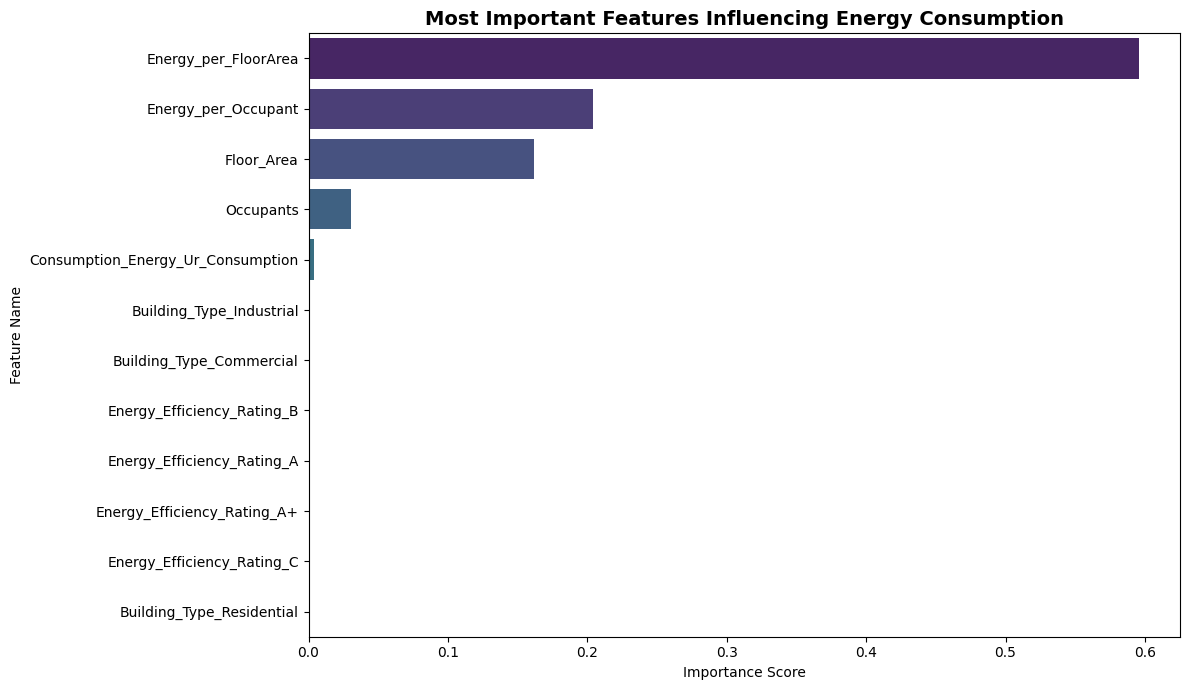

✅ Feature importance calculated and visualized successfully!

Important Features:
                               Feature  Importance
4                Energy_per_FloorArea    0.595404
3                 Energy_per_Occupant    0.204072
2                          Floor_Area    0.161763
1                           Occupants    0.030124
0   Consumption_Energy_Ur_Consumption    0.003984
6            Building_Type_Industrial    0.000898
5            Building_Type_Commercial    0.000897
10         Energy_Efficiency_Rating_B    0.000649
8          Energy_Efficiency_Rating_A    0.000618
9         Energy_Efficiency_Rating_A+    0.000559


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your final encoded + scaled dataset
data = pd.read_csv("Energy_Encoded_Scaled.csv")

# Separate features and target
X = data.drop(columns=["Consumption_Energy_Usage"], errors='ignore')
y = data["Consumption_Energy_Usage"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create importance DataFrame
feat_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Visualization
plt.figure(figsize=(12, 7))
sns.barplot(data=feat_importance.head(15), x="Importance", y="Feature", palette="viridis")
plt.title("Most Important Features Influencing Energy Consumption", fontsize=14, fontweight="bold")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

print("✅ Feature importance calculated and visualized successfully!")
print("\nImportant Features:\n", feat_importance.head(10))
